In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ne_vzbrc
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ne_vzbrc
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.05ac7e266fa9f36c29809225a0d0ccf7f0abb0c76_-cp36-none-any.whl size=101588 sha256=2cc8aeb90a0a44b1a3e675c96823ede2d6704f8e6502ea53d90abb5a2f83cbe7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ha975q9v/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import natsort
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("tf version =",tf.__version__)
from tensorflow.keras.models import Model


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


tf version = 2.2.0


In [ ]:
pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_train_ESOL_random_56x56.pickle','rb')
X_train = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/y_train_ESOL_random_56x56.pickle','rb')
y_train = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/y_test_ESOL_random_56x56.pickle','rb')
y_test = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_test_ESOL_random_56x56.pickle','rb')
X_test = pickle.load(pickle_in)

In [ ]:
load_model = 'transmodel2'


pathm = '/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/' + load_model
model = keras.models.load_model(pathm)
model.pop()
model.pop()
model.pop()
model.pop()
model.pop()
model.pop()
model.pop()
model.pop()

for layer in model.layers:
    layer.trainable = False

x = model.output
x = layers.Flatten()(x)
x = layers.Dense(84, kernel_regularizer = keras.regularizers.l2(0.0001))(x)
x = layers.Dropout(0.5)(x)
predicitions = layers.Dense(1)(x)


model_final = Model(inputs = model.inputs, outputs = predicitions)

optimizer = tf.keras.optimizers.Adam(0.0001)

model_final.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

print(model_final.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 54, 54, 64)        640       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0     

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 5.5994 - mae: 1.8145 - mse: 5.5839
Epoch: 0, loss:5.5994,  mae:1.8145,  mse:5.5839,  val_loss:2.9700,  val_mae:1.3756,  val_mse:2.9556,  
29/29 [==============================] - 1s 24ms/step - loss: 5.5994 - mae: 1.8145 - mse: 5.5839 - val_loss: 2.9700 - val_mae: 1.3756 - val_mse: 2.9556
Epoch 2/100
29/29 [==============================] - 0s 13ms/step - loss: 2.8382 - mae: 1.2979 - mse: 2.8245 - val_loss: 2.4370 - val_mae: 1.2188 - val_mse: 2.4239
Epoch 3/100
29/29 [==============================] - 0s 13ms/step - loss: 1.9534 - mae: 1.0678 - mse: 1.9407 - val_loss: 2.1434 - val_mae: 1.1612 - val_mse: 2.1310
Epoch 4/100
29/29 [==============================] - 0s 13ms/step - loss: 1.4290 - mae: 0.9059 - mse: 1.4168 - val_loss: 1.9901 - val_mae: 1.1298 - val_mse: 1.9781
Epoch 5/100
29/29 [==============================] - 0s 13ms/step - loss: 1.1047 - mae: 0.8041 - mse: 1.0927 - val_loss: 1.8889 - val_mae: 1.0992 - v

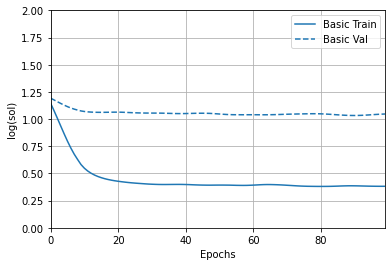

4/4 - 0s - loss: 2.5565 - mae: 1.2137 - mse: 2.5428
Testing set Mean Abs Error: +/-  1.21 mol/l


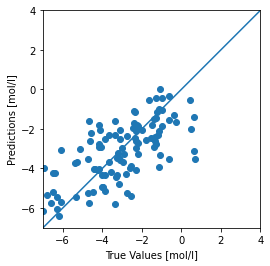

In [ ]:
EPOCHS = 100
batchsize = 32


history = model_final.fit(
  X_train, y_train, batch_size = batchsize,
  epochs = EPOCHS, validation_split = 0.1, verbose=1,
  callbacks=[tfdocs.modeling.EpochDots()])


plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 2])
plt.ylabel('log(sol)')
plt.show()

loss, mae, mse = model_final.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: +/- {:5.2f} mol/l".format(mae))

test_predictions = model_final.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [mol/l]')
plt.ylabel('Predictions [mol/l]')
lims = [-7, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [mol/l]")
_ = plt.ylabel("Count")

plt.show()

In [ ]:
#model_final.save('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/ESOL_final1.1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/ESOL_final1.1_r3/assets


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 54, 54, 64)        640       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 36864)             0  

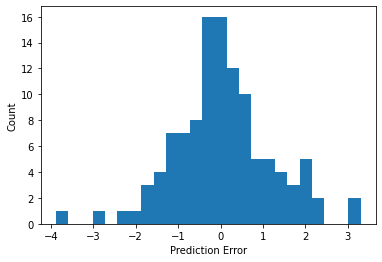

In [ ]:
load_model = 'ESOL_final1.1'


pathm = '/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/' + load_model
model = keras.models.load_model(pathm)
model.summary()
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: +/- {:5.2f} mol/l".format(mae))

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-7, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

plt.show()
